In [8]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import smearing_tools as st
from math import *


Ebins=[0,0.125,0.25,0.375,0.5,0.625,0.75,0.875,1,1.125,1.25,1.375,1.5,1.625,1.75,1.875,2,2.125,2.25,2.375,2.5,2.625,2.75,2.875,3,3.125,3.25,3.375,3.5,3.625,3.75,3.875,4,4.125,4.25,4.375,4.5,4.625,4.75,4.875,5,5.125,5.25,5.375,5.5,5.625,5.75,5.875,6,6.125,6.25,6.375,6.5,6.625,6.75,6.875,7,7.125,7.25,7.375,7.5,7.625,7.75,7.875,8]
#Ebins=[0.5,1.5,2.5,3.5,4.5]
#print(len(Ebins))
mA=st.smearingA(Ebins,0.05)
    
#mA.tolist()

mpl.style.use('fivethirtyeight')
mpl.rc('font', size=18)
mpl.rc('axes', titlesize=18)
mpl.rc('legend', fontsize=18)
mpl.rc('xtick', labelsize=18)
mpl.rc('ytick', labelsize=18)
mpl.rcParams['figure.figsize'] = (20,10)

In [9]:
a=np.array([1.0,2.0])
a/sum(a)

array([ 0.33333333,  0.66666667])

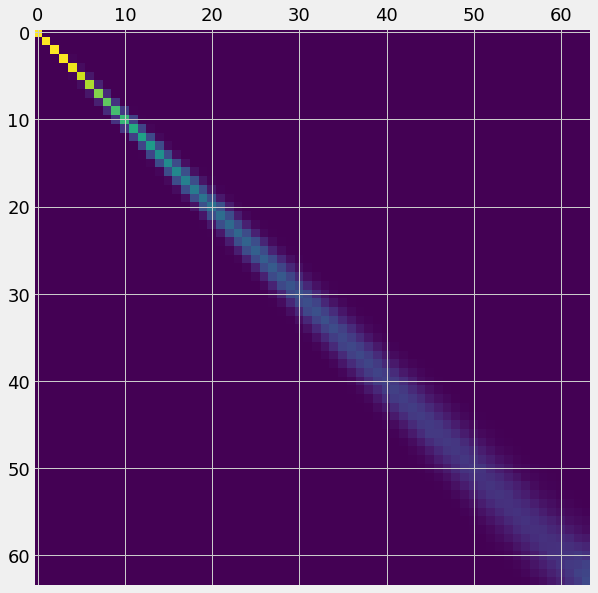

In [10]:
plt.matshow(mA)

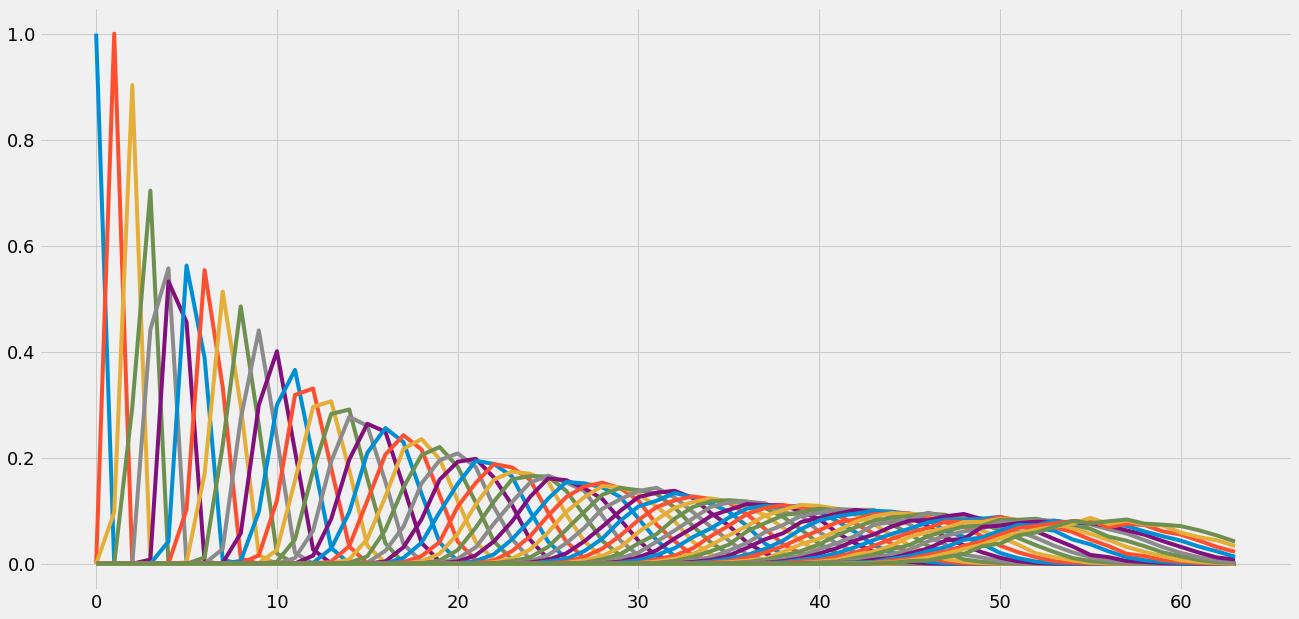

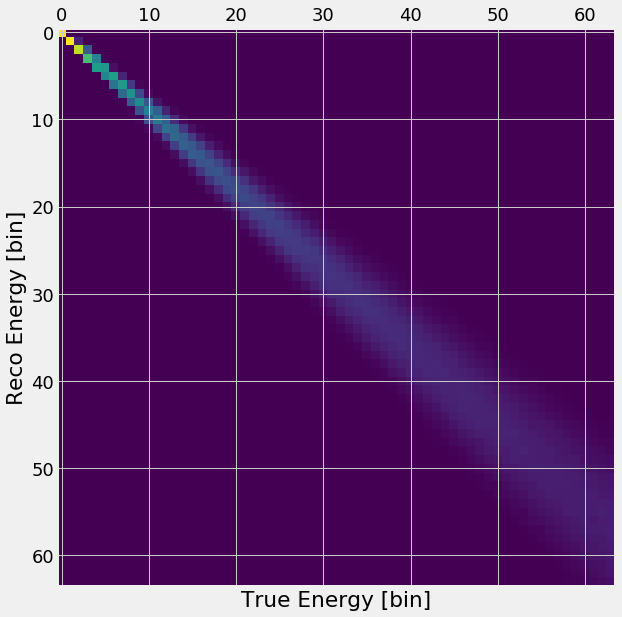

In [14]:
def smearingB(Ebins, sigma, missing ):
    dim=len(Ebins)-1
    m=np.zeros((dim,dim))

    for i in range(dim):
        e=(Ebins[i]+Ebins[i+1])/2
        x=e+0.05*e*np.random.randn(10000)-missing*2*e*np.random.random(10000)
        h=np.array(np.histogram(x,bins=Ebins)[0],'d')

        #store in matrix, normalizing each row to 1
        plt.plot(h/sum(h))
        m[:,i]=h/sum(h)

    return m

b=smearingB(Ebins,0.05,0.1)
plt.matshow(b)
plt.xlabel('True Energy [bin]')
plt.ylabel('Reco Energy [bin]')
#b.tolist()

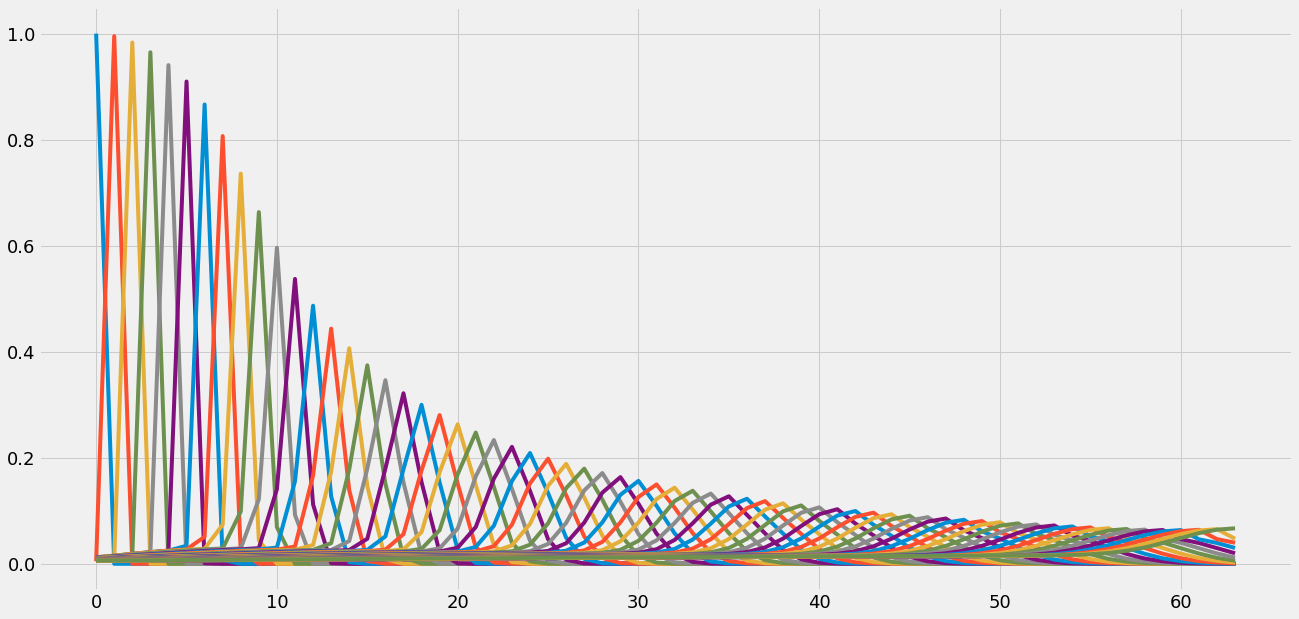

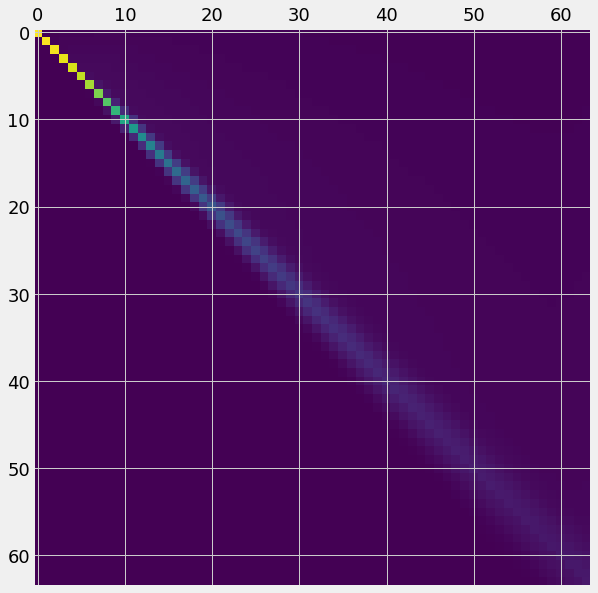

In [12]:
def asmearing(Ebins, sigma, bias):
    dim=len(Ebins)-1
    m=np.zeros((dim,dim))
    for i in range(dim):
        e1=(Ebins[i]+Ebins[i+1])/2
        h=np.zeros(dim)
        for j in range(dim):
            e2=(Ebins[j]+Ebins[j+1])/2
            h[j]=exp(-pow(e2-e1,2)/(2*sigma*sigma*e1*e1))
            if(e2<=e1):
                #h[j]+=e1*bias
                h[j]+=bias*e1*exp(-pow(e2-e1,2)/(2*0.5*e1*e1))
        plt.plot(h/sum(h))
        #plt.show()
        m[:,i]=h/sum(h)
    return m

mC=asmearing(Ebins, 0.05, 0.04)
    
plt.matshow(mC)

